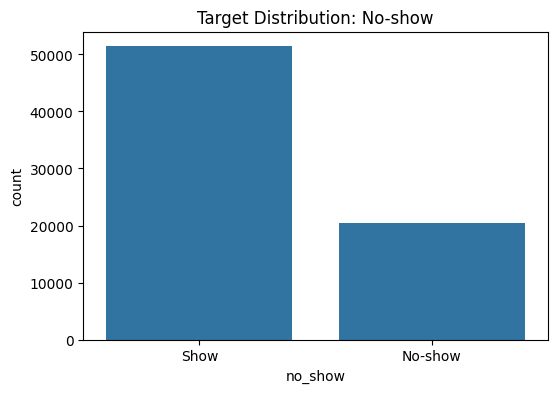

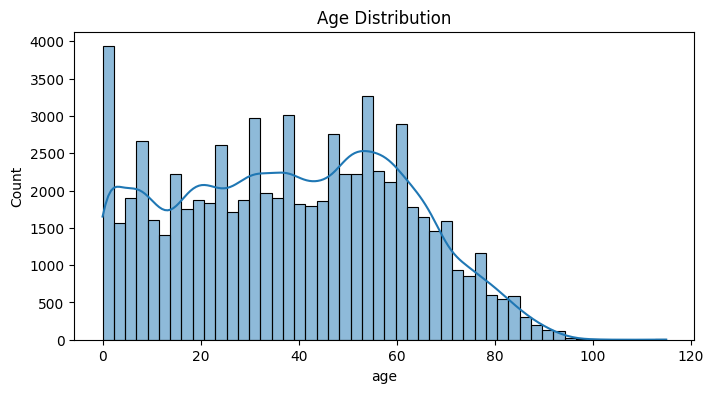

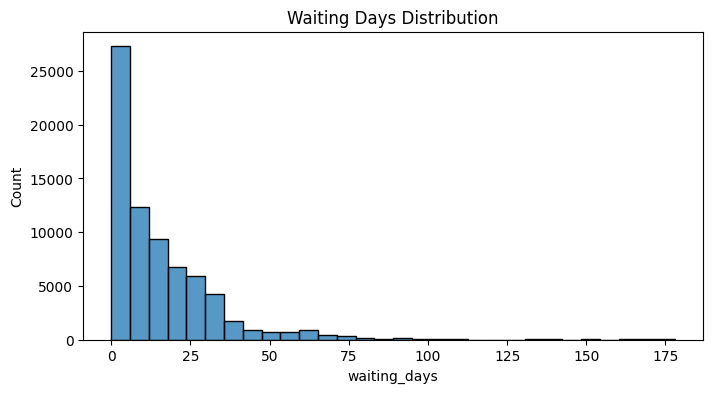

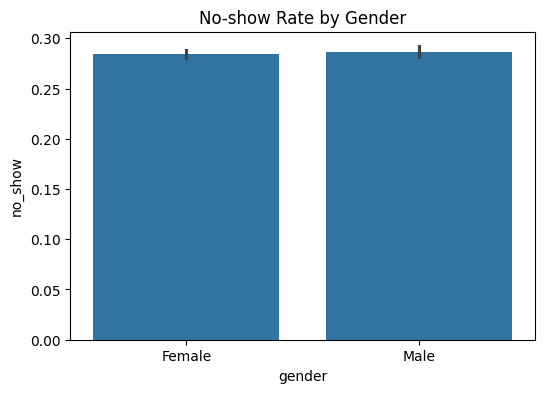

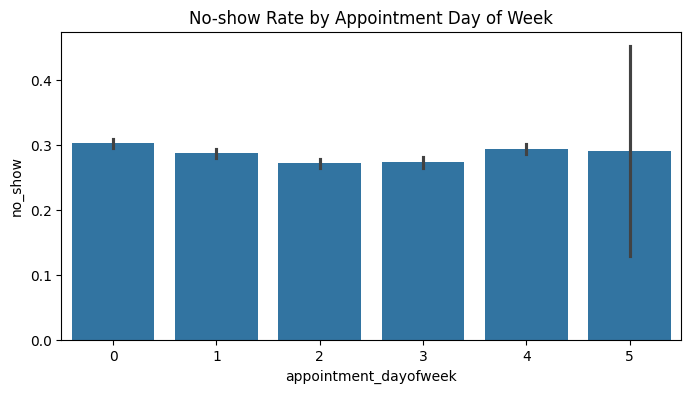

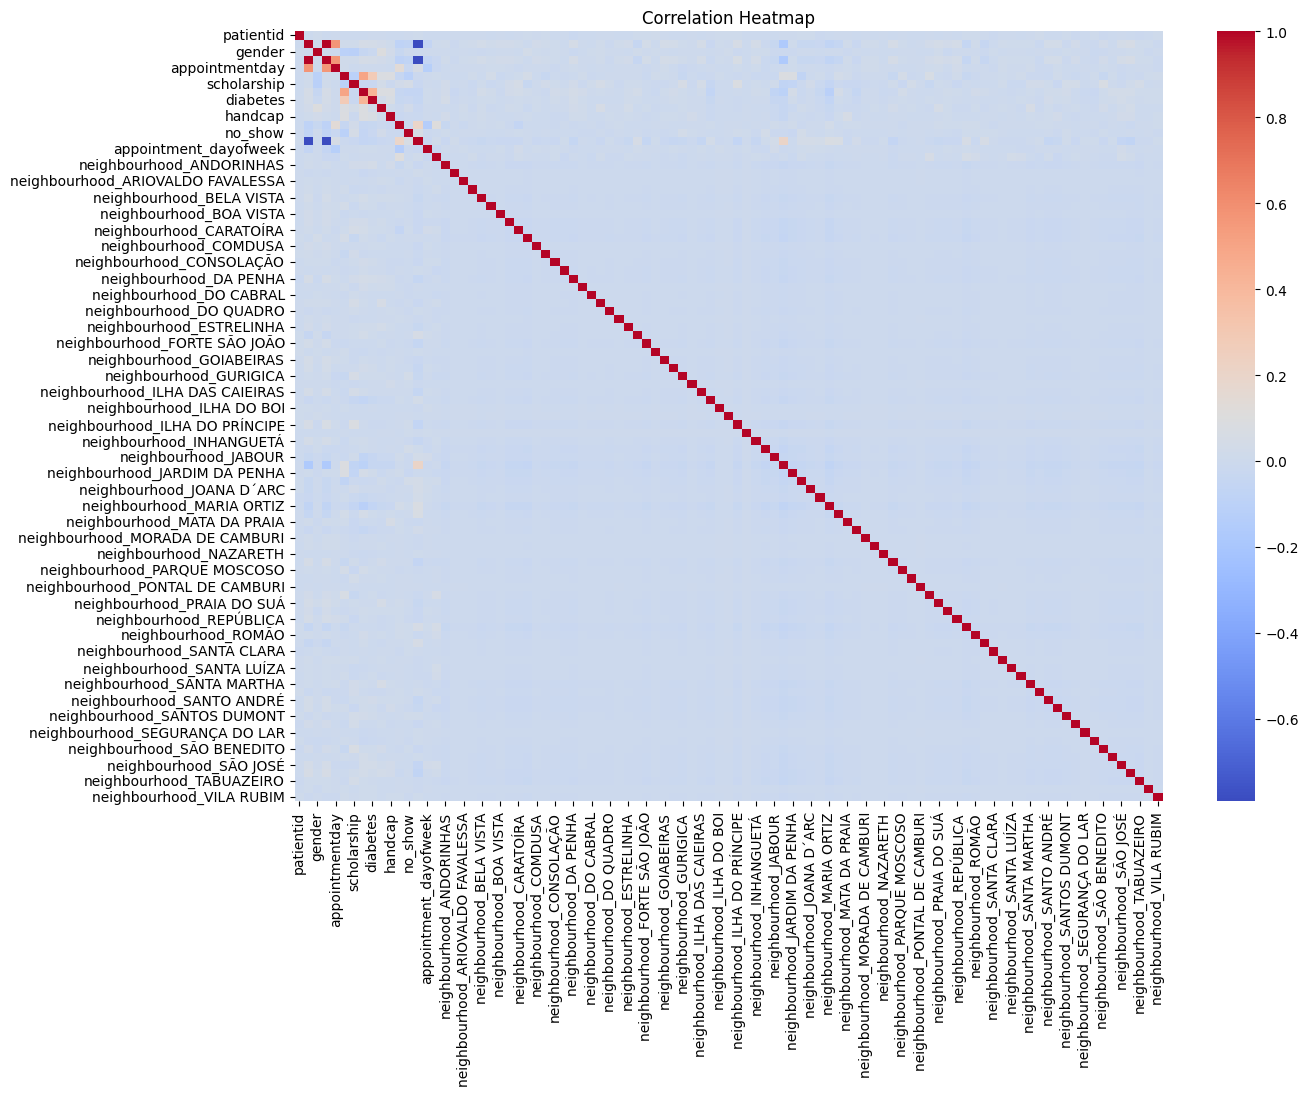

✅ Cleaned dataset saved as cleaned_appointments.csv


In [3]:
# preprocess_eda.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Load dataset
df = pd.read_csv("Medical Appointment Dataset.csv")

# -----------------------------
# Step 1: Basic Cleanup
# -----------------------------

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_')

# Fix target column
df['no_show'] = df['no_show'].map({'No': 0, 'Yes': 1})

# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle negative age
df = df[df['age'] >= 0]

# Convert datetime columns
df['scheduledday'] = pd.to_datetime(df['scheduledday'], errors='coerce')
df['appointmentday'] = pd.to_datetime(df['appointmentday'], errors='coerce')

# Feature Engineering
df['waiting_days'] = (df['appointmentday'] - df['scheduledday']).dt.days
df = df[df['waiting_days'] >= 0]  # Remove invalid negatives

df['appointment_dayofweek'] = df['appointmentday'].dt.dayofweek
df['scheduled_dayofweek'] = df['scheduledday'].dt.dayofweek

# Fix 'handcap' column (0–4 → binary)
df['handcap'] = df['handcap'].apply(lambda x: 1 if x > 0 else 0)

# -----------------------------
# Step 2: Encoding Categorical Features
# -----------------------------

# Encode 'gender'
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

# One-hot encode Neighbourhood (optional: or use label encoding)
df = pd.get_dummies(df, columns=['neighbourhood'], drop_first=True)

# -----------------------------
# Step 3: Exploratory Data Analysis
# -----------------------------

# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='no_show', data=df)
plt.title('Target Distribution: No-show')
plt.xticks([0, 1], ['Show', 'No-show'])
plt.savefig("output/target_distribution.png")
plt.show()

# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=50, kde=True)
plt.title("Age Distribution")
plt.savefig("output/age_distribution.png")
plt.show()

# Waiting days
plt.figure(figsize=(8, 4))
sns.histplot(df['waiting_days'], bins=30)
plt.title("Waiting Days Distribution")
plt.savefig("output/waiting_days.png")
plt.show()

# No-show rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='no_show', data=df)
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("No-show Rate by Gender")
plt.savefig("output/no_show_by_gender.png")
plt.show()

# No-show rate by day of week
plt.figure(figsize=(8, 4))
sns.barplot(x='appointment_dayofweek', y='no_show', data=df)
plt.title("No-show Rate by Appointment Day of Week")
plt.savefig("output/no_show_by_dayofweek.png")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("output/correlation_heatmap.png")
plt.show()

# -----------------------------
# Step 4: Export Cleaned Dataset
# -----------------------------

df.to_csv("cleaned_appointments.csv", index=False)
print("✅ Cleaned dataset saved as cleaned_appointments.csv")
